In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Jan26_allc.csv', low_memory=False)


In [21]:
df.columns.tolist()

['Elapsed Time',
 'Latitude',
 'Longitude',
 'Altitude(MSL)',
 'Altitude(AGL)',
 'Heading(mag)',
 'Heading(true)',
 'Pitch',
 'Roll',
 'Yaw',
 'Alpha',
 'Beta',
 'Groundspeed',
 'Airspeed(Ind)',
 'Airspeed(True)',
 'Vert. Speed',
 'Baro Altitude Pilot',
 'Baro Setting Pilot',
 'Baro Altitude Copilot',
 'Baro Setting Copilot',
 'Radio Altitude Pilot',
 'Radio Altitude Copilot',
 'Wheels On Ground-[0]',
 'Wheels On Ground-[1]',
 'Wheels On Ground-[2]',
 'Compass Heading',
 'Ground Track Pilot',
 'Ground Track Copilot',
 'Roll Rate',
 'Pitch Rate',
 'Yaw Rate',
 'Turn Rate',
 'Sideslip Angle',
 'Angle of Attack',
 'FMS Vert Flight Path Angle',
 'Pitch Path',
 'Heading Path',
 'Flight Path Angle - VV-[0]',
 'Flight Path Angle - VV-[1]',
 'Flight Path Angle - VV-[2]',
 'Ground Track - VV-[0]',
 'Ground Track - VV-[1]',
 'Ground Track - VV-[2]',
 'Roll Acceleration',
 'Pitch Acceleration',
 'Yaw Acceleration',
 'Acceleration in Latitude',
 'Acceleration in Normal',
 'Acceleration in Longitud

In [20]:
df[1:20].transpose()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Elapsed Time,0.047,0.071,0.096,0.119,0.141,0.163,0.184,0.209,0.234,0.255,0.277,0.3,0.321,0.343,0.364,0.39,0.412,0.439,0.463
Latitude,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996,39.358996
Longitude,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699,-74.434699
Altitude(MSL),162.31,162.31,162.31,162.31,162.31,162.31,162.31,162.31,162.31,162.31,162.31,162.31,162.31,162.31,162.31,162.31,162.31,162.31,162.31
Altitude(AGL),0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Transmission Chip Warning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transmission Oil Temp Warning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transmission Oil Pressure Warning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DateTime,2023-01-26 16:10:42.933,2023-01-26 16:10:42.957,2023-01-26 16:10:42.982,2023-01-26 16:10:43.005,2023-01-26 16:10:43.026,2023-01-26 16:10:43.049,2023-01-26 16:10:43.070,2023-01-26 16:10:43.094,2023-01-26 16:10:43.120,2023-01-26 16:10:43.141,2023-01-26 16:10:43.163,2023-01-26 16:10:43.186,2023-01-26 16:10:43.207,2023-01-26 16:10:43.228,2023-01-26 16:10:43.250,2023-01-26 16:10:43.275,2023-01-26 16:10:43.298,2023-01-26 16:10:43.325,2023-01-26 16:10:43.349


In [22]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')
data = df[['DateTime', 'Vert. Speed', 'Altitude(AGL)', 'Groundspeed', 'Phase','Latitude', 'Longitude']]

In [24]:
sorted_df = data.sort_values(by='DateTime', ascending=True)
sorted_df = sorted_df.reset_index(drop=True)

In [25]:
sorted_df.head()

,DateTime,Vert. Speed,Altitude(AGL),Groundspeed,Phase,Latitude,Longitude
0,2023-01-26 14:22:17.586,0.011,0.06,0.0,Hover In Ground Effect,39.464851,-74.565964
1,2023-01-26 14:22:17.605,0.011,0.06,0.0,Hover In Ground Effect,39.464851,-74.565964
2,2023-01-26 14:22:17.623,0.011,0.06,0.0,Hover In Ground Effect,39.464851,-74.565964
3,2023-01-26 14:22:17.640,0.011,0.06,0.0,Hover In Ground Effect,39.464851,-74.565964
4,2023-01-26 14:22:17.658,0.011,0.06,0.0,Hover In Ground Effect,39.464851,-74.565964


In [26]:
def print_consecutive_periods(df, gap_seconds):
    for i in range(len(df)):
        if (i+1 < len(df)):
            diff = df['DateTime'].iloc[i+1] - df['DateTime'].iloc[i]
            if diff.total_seconds() > gap_seconds:
                    print(df['DateTime'].iloc[i]," to ", df['DateTime'].iloc[i+1])

In [27]:
print_consecutive_periods(sorted_df, gap_seconds=1)

2023-01-26 14:28:44.835000  to  2023-01-26 14:29:01.857000
2023-01-26 15:03:06.416000  to  2023-01-26 15:15:07.738000
2023-01-26 16:05:13.156000  to  2023-01-26 16:09:50.866000
2023-01-26 16:10:11.122000  to  2023-01-26 16:10:13.868000
2023-01-26 16:10:29.038000  to  2023-01-26 16:10:37.282000
2023-01-26 16:10:39.330000  to  2023-01-26 16:10:42.914000
2023-01-26 16:11:36.487000  to  2023-01-26 16:11:59.992000
2023-01-26 16:12:19.455000  to  2023-01-26 16:12:36.530000
2023-01-26 16:38:23.862000  to  2023-01-26 16:51:08.805000
2023-01-26 17:02:01.765000  to  2023-01-26 17:04:30.193000
2023-01-26 17:11:26.840000  to  2023-01-26 18:42:42.971000
2023-01-26 19:01:50.909000  to  2023-01-26 19:15:06.174000
2023-01-26 19:27:59.202000  to  2023-01-26 19:32:28.665000
2023-01-26 19:33:09.912000  to  2023-01-26 19:36:04.226000
2023-01-26 20:09:38.433000  to  2023-01-26 20:39:23.761000
2023-01-26 20:45:44.962000  to  2023-01-26 20:50:28.478000
2023-01-26 20:56:49.939000  to  2023-01-26 21:12:00.9970

In [28]:
start_date = '2023-01-26 15:15:07.738000'
end_date = '2023-01-26 16:05:13.156000'

def filter_data(df, start_date_time, end_date_time):
    filtered_df = df.loc[(df['DateTime'] >= start_date_time) & (df['DateTime'] <= end_date_time)]
    filtered_df = filtered_df.reset_index(drop=True)
    return filtered_df

filtered_df = filter_data(sorted_df, start_date, end_date)
filtered_df.head()

,DateTime,Vert. Speed,Altitude(AGL),Groundspeed,Phase,Latitude,Longitude
0,2023-01-26 15:15:07.738,0.069,0.01,0.332,Hover In Ground Effect,39.220155,-74.791641
1,2023-01-26 15:15:07.755,0.113,0.01,0.366,Hover In Ground Effect,39.220155,-74.791641
2,2023-01-26 15:15:07.772,0.185,0.02,0.386,Hover In Ground Effect,39.220155,-74.791641
3,2023-01-26 15:15:07.792,0.267,0.02,0.378,Hover In Ground Effect,39.220155,-74.791641
4,2023-01-26 15:15:07.809,0.363,0.02,0.343,Hover In Ground Effect,39.220155,-74.791641


In [29]:
# naive approach just detecting change in phase and counting
def phases_rollup_count_using_phase_change(df):
    window_size = 5 #seconds
    phase_counts = {phase: 0 for phase in df['Phase'].unique()} # Initializing a count map {"Climb":0, ...}
    results= []
    phases = df['Phase'].values
    number_of_phases = len(phases)
    last_index=0;
    for i in range(number_of_phases):
        if (i+1 < number_of_phases-1):
          # checking if there is a phase change
          if phases[i] != phases[i+1]:
            phase_counts[phases[i]]+=1
            diff_seconds = (df['DateTime'][i] - df['DateTime'][last_index]).total_seconds()
            if diff_seconds > window_size:
              results.append({"phase":phases[i], "time_seconds": diff_seconds, "number_of_rows":i - last_index})
            last_index=i+1
    final_phases = pd.DataFrame(results)
    return final_phases
final_phases = phases_rollup_count_using_phase_change(sorted_df)
final_phases

,phase,time_seconds,number_of_rows
0,Hover In Ground Effect,71.651,3535
1,Standing,146.930,7251
2,Hover In Ground Effect,13.217,655
3,Hover In Ground Effect,11.124,554
4,Standing,11.708,576
...,...,...,...
581,Descent,29.019,1235
582,Cruise,61.369,2642
583,Descent,224.958,9936
584,LandingOrTakeOff,68.917,2975


In [32]:
import seaborn as sns


def plot_all_phases(df):
    # Get unique values from the column
    unique_phase_values = df['Phase'].unique()
    # Generate a list of random colors for unique values using seaborn
    colors = sns.color_palette("hsv", len(unique_phase_values))

    # Create a dictionary mapping unique values to random colors
    color_dict = dict(zip(unique_phase_values, colors))

    def color_phase(phase):
        return color_dict[phase]
    # Create an array of colors based on the 'status' column
    colors = df['Phase'].map(color_phase)

    plt.figure()
    plt.scatter(df['DateTime'], df['Phase'], c=colors, label='Phases', s=1)
    plt.xlabel('DateTime')
    plt.ylabel('Phase')
    plt.title("Phases")
    plt.legend()
    plt.show()

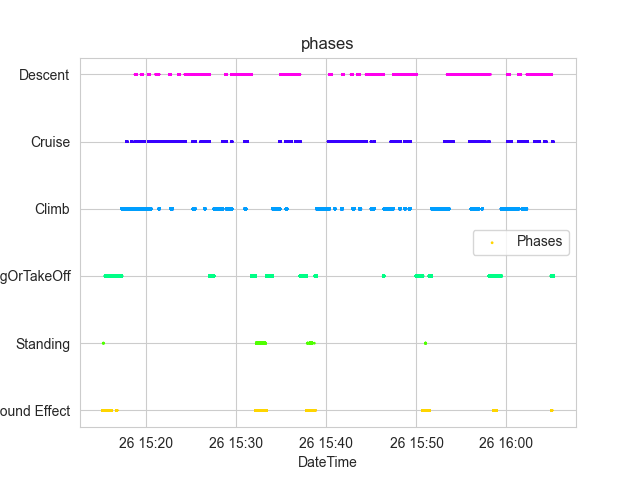

In [327]:
plot_all_phases(filtered_df)

In [33]:
def sliding_window_grouping_using_mode(df):
    ## slow
    time_interval = '5S'  # 5 seconds interval, can be changed to other valid string formats
    window_size = df.set_index('DateTime').resample(time_interval).size()
    dominant_phase = df.groupby(pd.Grouper(key='DateTime', freq=time_interval))['Phase'].apply(lambda x: x.mode().iloc[0])
    result = pd.DataFrame({'Phase': dominant_phase, 'Count': window_size}).reset_index()

    # Merge consecutive windows with the same phase
    merged_windows = []
    current_phase = None
    start_time = None
    for index, row in result.iterrows():
        if row['Phase'] != current_phase:
            # New phase, start a new window
            if current_phase is not None:
                merged_windows.append({'Phase': current_phase, 'StartDateTime': start_time, 'EndDateTime': prev_time})
            current_phase = row['Phase']
            start_time = row['DateTime']
        prev_time = row['DateTime']

    # Add the last window
    if current_phase is not None:
        merged_windows.append({'Phase': current_phase, 'StartDateTime': start_time, 'EndDateTime': prev_time})

    merged_df = pd.DataFrame(merged_windows)
    return merged_df

In [34]:
grouped_phases= sliding_window_grouping_using_mode(filtered_df)
grouped_phases

,Phase,StartDateTime,EndDateTime
0,Hover In Ground Effect,2023-01-26 15:15:05,2023-01-26 15:15:20
1,LandingOrTakeOff,2023-01-26 15:15:25,2023-01-26 15:15:50
2,Hover In Ground Effect,2023-01-26 15:15:55,2023-01-26 15:16:00
3,LandingOrTakeOff,2023-01-26 15:16:05,2023-01-26 15:17:10
4,Climb,2023-01-26 15:17:15,2023-01-26 15:18:40
...,...,...,...
127,Cruise,2023-01-26 16:03:35,2023-01-26 16:03:35
128,Descent,2023-01-26 16:03:40,2023-01-26 16:04:10
129,Cruise,2023-01-26 16:04:15,2023-01-26 16:04:15
130,Descent,2023-01-26 16:04:20,2023-01-26 16:04:55


In [35]:
def sliding_window_phases_labeling_using_mode(df):
    time_interval = '5S'  # 5 seconds interval, can be changed to other valid string formats
    dominant_phase = df.groupby(pd.Grouper(key='DateTime', freq=time_interval))['Phase'].apply(lambda x: x.mode().iloc[0])
    return dominant_phase

In [68]:
import mplcursors
import matplotlib.pyplot as plt


def plot_phases_graph(data, columns, labels, title):
    unique_phase_values = data['Phase'].unique()

    # Generate a list of random colors for unique values using seaborn
    colors = sns.color_palette("deep", len(unique_phase_values))

    # Create a dictionary mapping unique values to random colors
    color_dict = dict(zip(unique_phase_values, colors))
    # Create the plot
    plt.figure(figsize=(10, 6))


    # Plot each phase separately with its corresponding color
    for phase, color in color_dict.items():
        phase_data = data[data['Phase'] == phase]
        plt.scatter(phase_data[columns[0]], phase_data[columns[1]], label=f'Phase: {phase}', color=color, marker='o')

    # Customize the plot
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(title)
    plt.legend()
    plt.grid(True)
    mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f"Phase: {data['Phase'][sel.target.index]}"))

    # Show the plot
    plt.show()

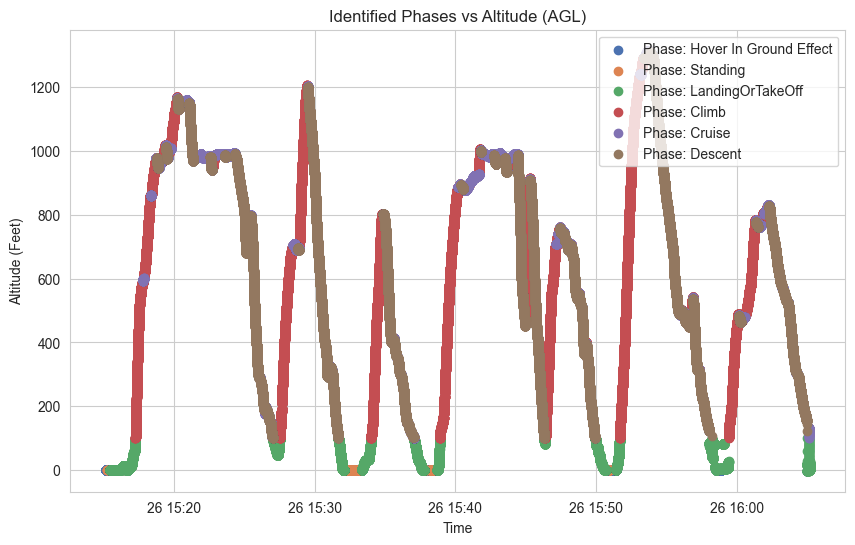

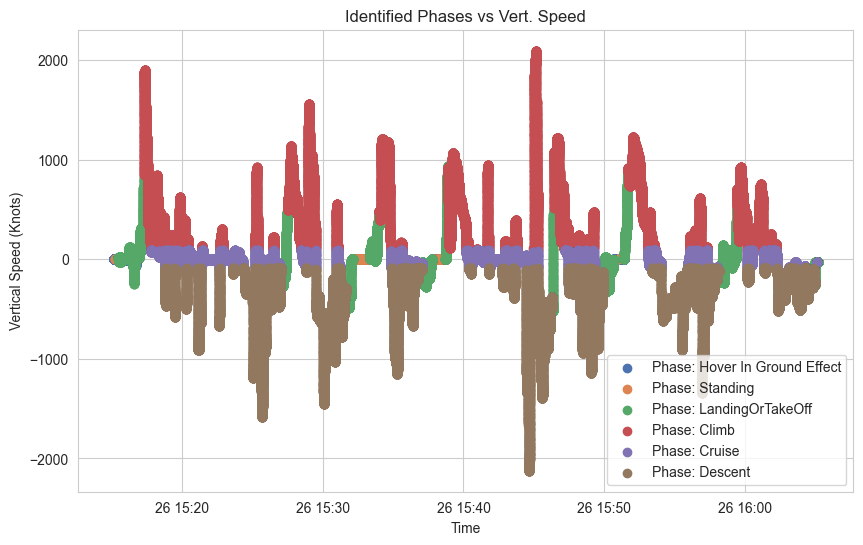

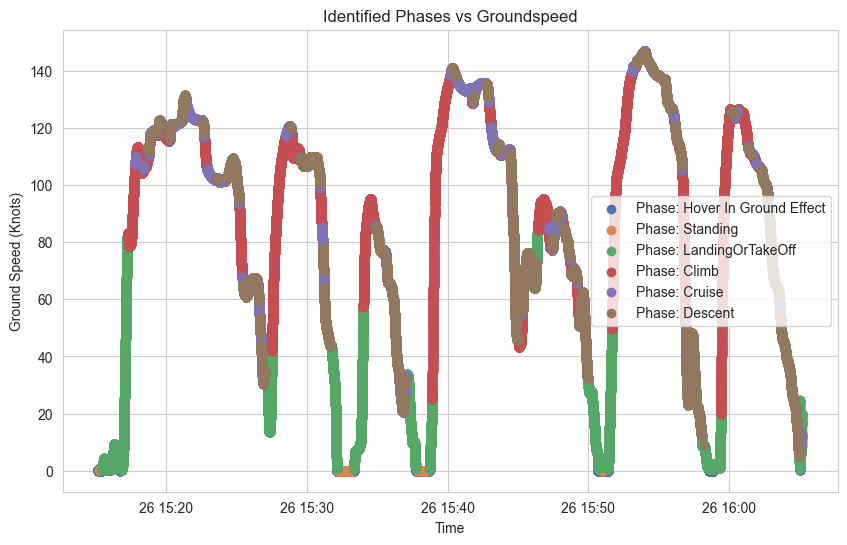

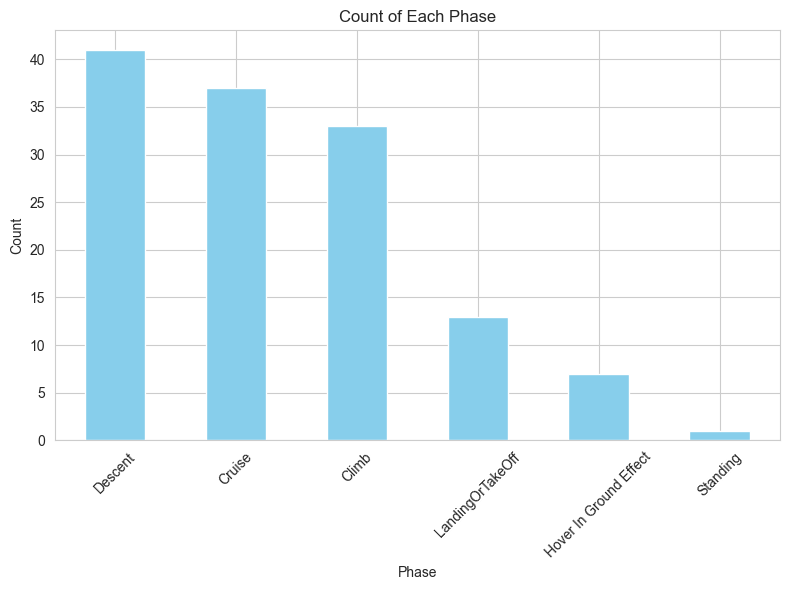

In [69]:
plot_phases_graph(filtered_df, ['DateTime','Altitude(AGL)'], ['Time','Altitude (Feet)'], 'Identified Phases vs Altitude (AGL)')
plot_phases_graph(filtered_df, ['DateTime','Vert. Speed'], ['Time','Vertical Speed (Knots)'],'Identified Phases vs Vert. Speed')
plot_phases_graph(filtered_df, ['DateTime', 'Groundspeed'], ['Time','Ground Speed (Knots)'], 'Identified Phases vs Groundspeed')


phase_counts = sliding_window_grouping_using_mode(filtered_df)['Phase'].value_counts()
# Create a bar chart
plt.figure(figsize=(8, 6))
phase_counts.plot(kind='bar', color='skyblue')
# Set labels and title
plt.xlabel('Phase')
plt.ylabel('Count')
plt.title('Count of Each Phase')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


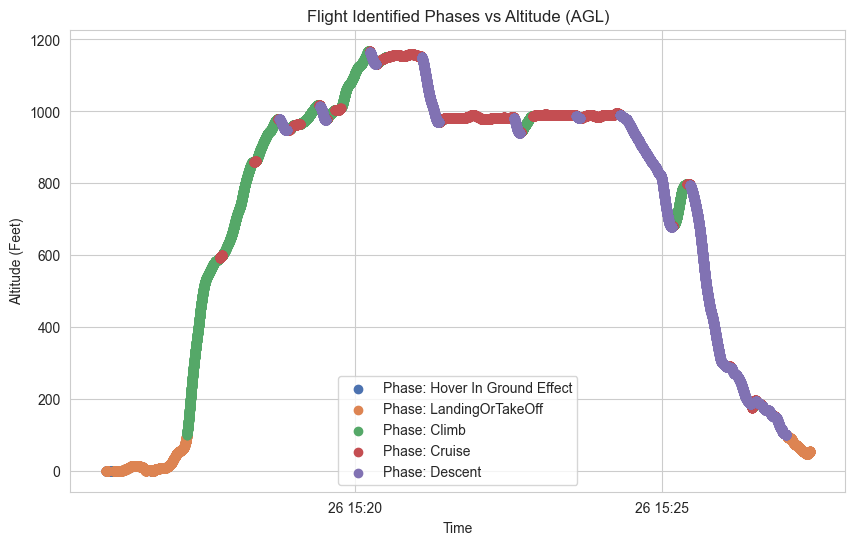

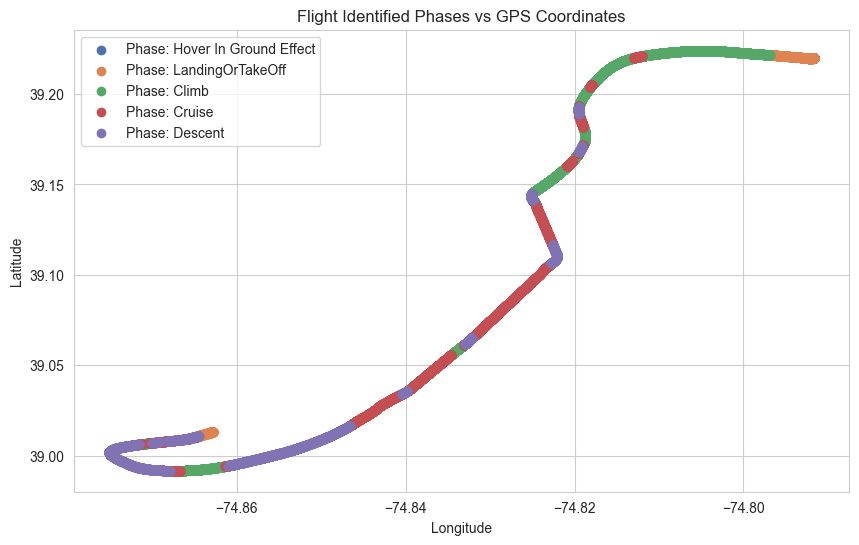

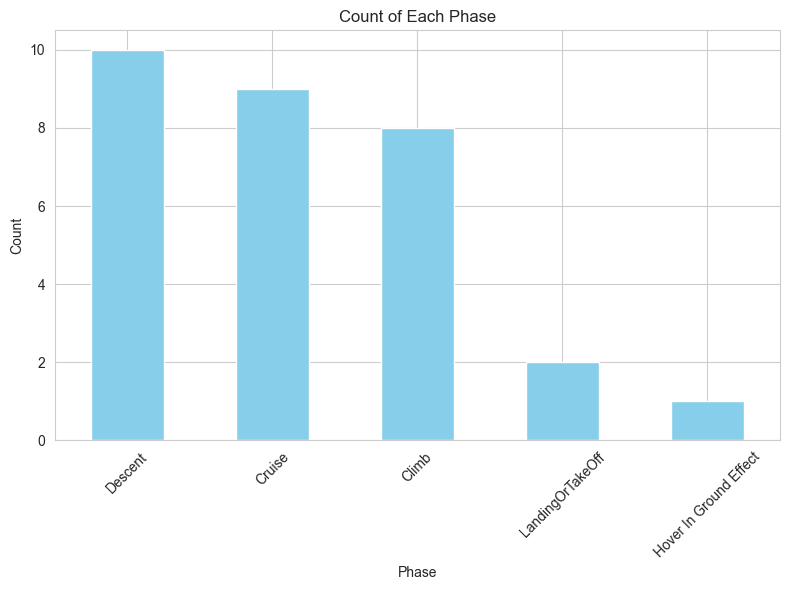

In [80]:
flight_start = '2023-01-26 15:15:56.000000'
flight_end = '2023-01-26 15:27:25.00000'

single_flight_df = filter_data(filtered_df, flight_start, flight_end)
plot_phases_graph(single_flight_df, ['DateTime','Altitude(AGL)'], ['Time','Altitude (Feet)'], 'Flight Identified Phases vs Altitude (AGL)')
plot_phases_graph(single_flight_df, ['Longitude', 'Latitude'], ['Longitude','Latitude'], 'Flight Identified Phases vs GPS Coordinates')


phase_counts = sliding_window_grouping_using_mode(single_flight_df)['Phase'].value_counts()
# Create a bar chart
plt.figure(figsize=(8, 6))
phase_counts.plot(kind='bar', color='skyblue')
# Set labels and title
plt.xlabel('Phase')
plt.ylabel('Count')
plt.title('Count of Each Phase')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
phase_counts.head()

Phase
Descent                   10
Cruise                     9
Climb                      8
LandingOrTakeOff           2
Hover In Ground Effect     1
Name: count, dtype: int64